# Import Statements

In [2]:
import sys
import re
import matplotlib.pyplot as plt
import numpy as np
import csv

# Files

In [3]:
f = 'probs.csv' # csv file
labels = 'eval_labels.csv' # label file
different = []

# Labels

| Label        | ON           | OFF  |
| ------------- |:-------------:|-----:| 
| 0| narrow diagonal (1) |narrow diagonal (1) |
| 1| narrow diagonal (1+)|narrow diagonal (1+)|
| 2|narrow horizontal|narrow horizontal|
| 3|narrow vertical (1)|narrow vertical (1)|
| 4|narrow vertical (even)|narrow vertical (even)|
| 5|narrow vertical (inf)|narrow vertical (inf)|
| 6|wide diagonal (1)|wide diagonal (1)|
| 7|wide diagonal (1+)|wide diagonal (1+)|
| 8|no_sig|no_sig|
| 9|comb_sig|comb_sig|
| 10| narrow diagonal (1) |other |
| 11| narrow diagonal (1+)|other |
| 12|narrow horizontal|other |
| 13|narrow vertical (1)|other |
| 14|narrow vertical (even)|other |
| 15|narrow vertical (inf)|other |
| 16|wide diagonal (1)|other |
| 17|wide diagonal (1+)|other |
| 18|no_sig|other |
| 19|comb_sig|other |



## Plot a histogram of probabilities of each class

In [4]:
def histoPlot(f):
    """
    f: csv file containing the predicted probabilities of
    each class for all test samples.
    
    """
    with open(f, 'rt') as fi:
        reader = csv.reader(fi)
        data = list(reader)
    fi.close()
    data = np.array([d[1:] for d in data][1:]).astype(np.float)
#     confidences = []
#     for d in data:
#         c = 
    data = data.flatten()
    print("max confidence: " + str(np.max(data)))
    print("min confidence: " + str(np.min(data)))

    plt.hist(data, bins = np.linspace(0,1,101))
    plt.title("Histogram of Confidence Probabilities")
    plt.ylim(ymax=10000)
#     plt.savefig('./HistogramofConfidenceProbabilities')
    plt.show()


max confidence: 1.0
min confidence: 0.0


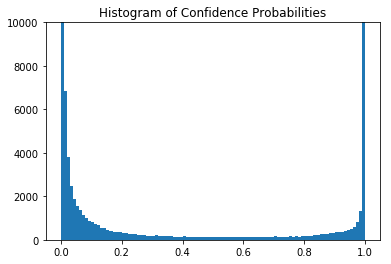

In [5]:
histoPlot(f)

In [29]:
def histoPlotClass(f, c):
    """
    f: csv file containing the predicted probabilities of
    each class for all test samples.
    
    returns a histogram of the confidence that class C 
    was predicted (only plot points in which case class
    C was determined to be the most probable class).
    """
    with open(f, 'rt') as fi:
        reader = csv.reader(fi)
        data = list(reader)
    fi.close()
    
    data = np.array([d[1:] for d in data][1:]).astype(np.float)
    data_list = data.tolist()
    maximums = [max(l) for l in data]
    classes = [d.index(m) for d, m in zip(data_list, maximums)]
    
    hist_dict = {}
    for key, val in zip(classes, maximums):
        hist_dict[key] = hist_dict.get(key, []) + [val]
        
    plt.hist(hist_dict[c], bins = np.linspace(0, 1, 101))
    plt.title("Histogram of Confidence Probabilities // Class " + str(c))
    plt.show()


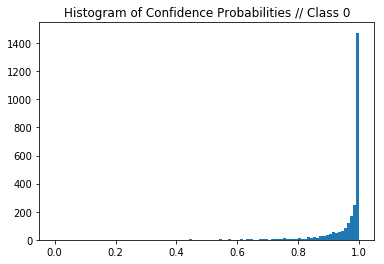

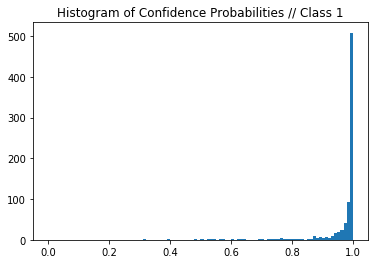

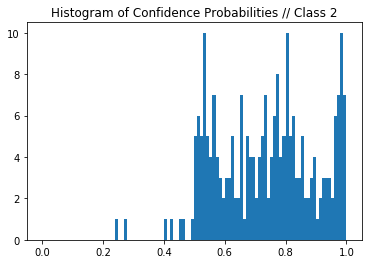

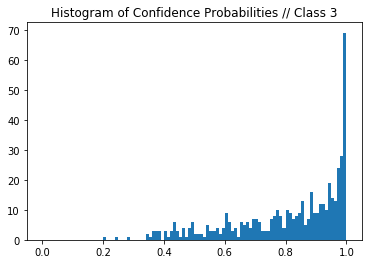

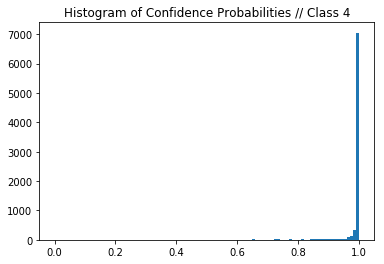

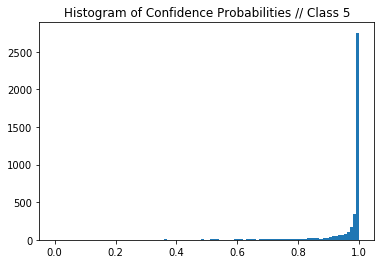

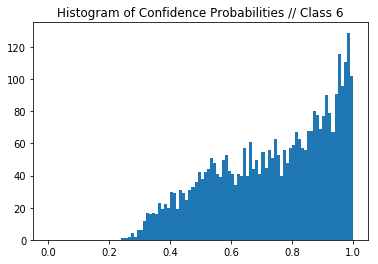

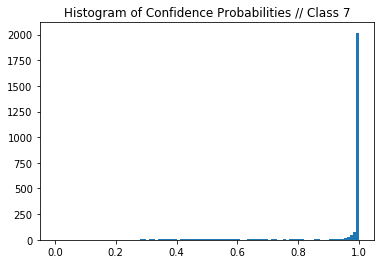

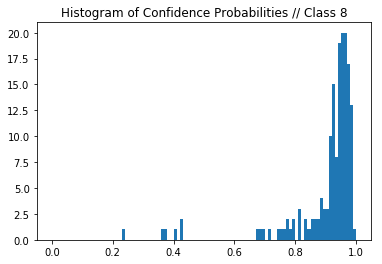

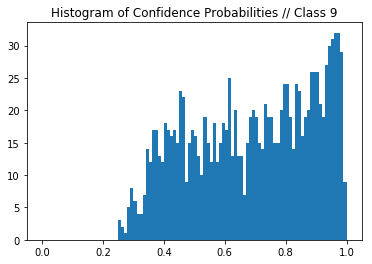

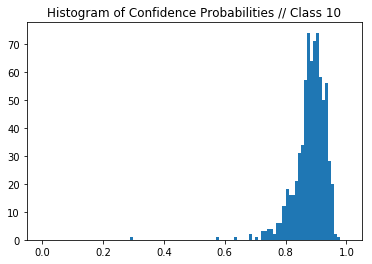

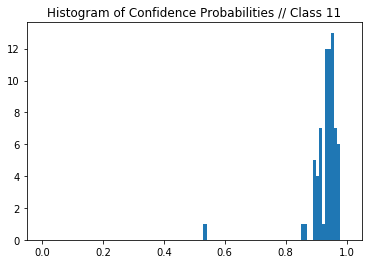

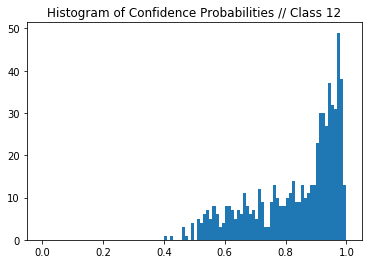

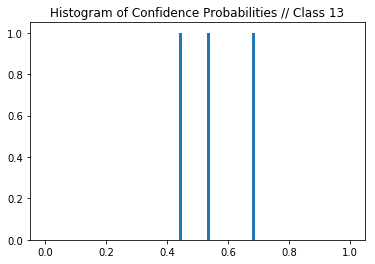

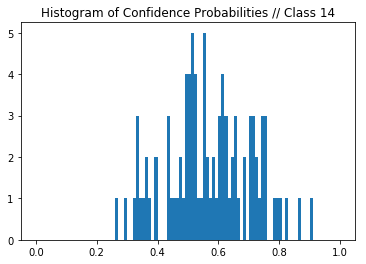

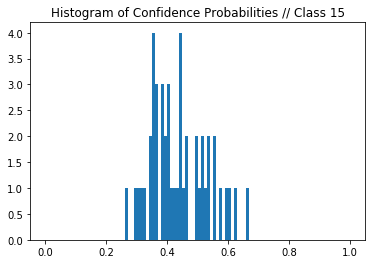

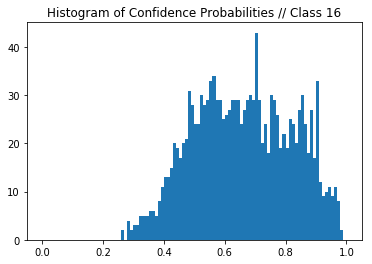

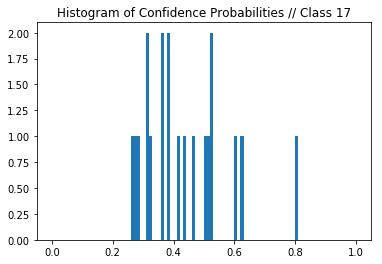

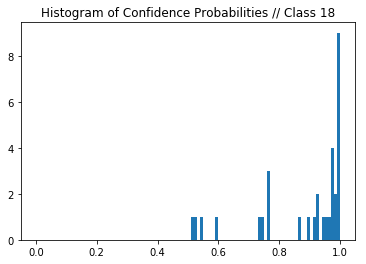

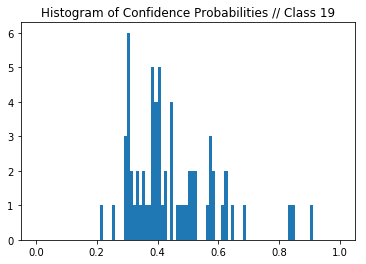

In [31]:
for x in range(20):
    histoPlotClass(f, x)

## Plot probabilities of each class for sample x

In [6]:
def randPlot(f, labels, s = -1):
    """
    f: csv file containing the predicted probabilities of
    each class for all test samples.
    labels: csv file containing the actual label of each
    class for all test samples.
    s: optional argument (int) denoting sample number
    
    returns a bar graph of predicted probabilities for each
    class for a random sample, with the correct class 
    highlighted in red.
    """

    header, correct = 0, 0

    fRead = open(f, 'r')
    reader = csv.reader(fRead)
    row_count = sum(1 for row in fRead) - 1
    fRead.close()


    if s == -1 or s > row_count:
        sample = np.random.randint(0, row_count)
    else:
        sample = s
        
    i = 0

    fRead = open(f, 'r')
    reader = csv.reader(fRead)
    for row in reader:
        if i == 0:
            header = row
            i += 1
        elif i == sample + 1:
            vals = row
            break
        else:
            i += 1
    fRead.close()

    labels = open(labels, 'r')
    reader = csv.reader(labels)
    i = 0
    for row in reader:
        if i == sample:
            if row[0][-1] == '0':
                correct = int(row[0][0])
            else:
                correct = int(row[0][0]) * 10 + int(row[0][2])
            break
        else:
            i += 1
    labels.close()
            
    values = [float(v) for v in vals][1:]
    axis = [int(h) for h in header[1:]]
    bars = plt.bar(axis, values)

    max_val, pred = max((v, i) for i, v in enumerate(values))
    plt.xticks(np.arange(0, 20))
    bars[correct].set_color('r')
    
    print("sample number: " + str(sample))
    print("correct: " + str(correct))
    print("predicted: " + str(pred) + " with certainty: " + str(max_val))
    
    plt.title(sample)
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()


sample number: 16428
correct: 1
predicted: 1 with certainty: 0.99721199


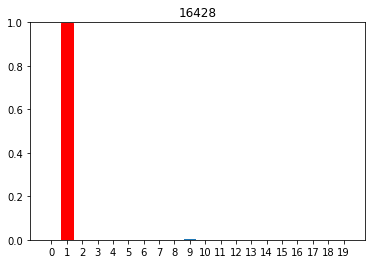

In [7]:
randPlot(f, labels)

## Confusion Matrix of Categorization vs. Actual

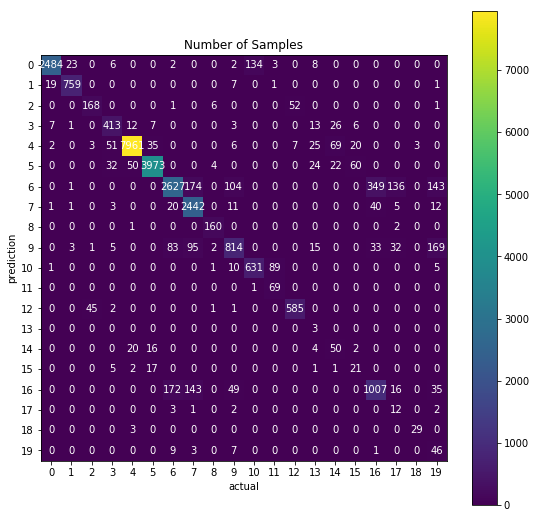

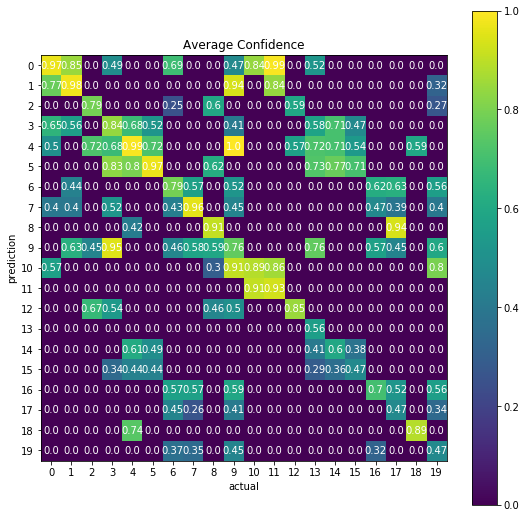

In [8]:
def conf_mat(f, labels):
    """
    f: csv file containing the predicted probabilities of
    each class for all test samples.
    labels: csv file containing the actual label of each
    class for all test samples.
    
    returns 2 confusion matrices comparing  predictions (row) vs actual (col):
        a) number of samples
        b) average confidence
    """
    with open(f, 'rt') as fi:
        reader = csv.reader(fi)
        next(reader) # skip header
        data = list(reader)
    fi.close()
    
    with open(labels, 'rt') as fi:
        reader = csv.reader(fi)
        label = list(reader)
    fi.close()

    conf_arr = np.zeros((20,20),dtype=np.int64)
    conf_arr2 = np.zeros((20,20))

    
    data = [[float(f) for f in d[1:]] for d in data]
    label = [int(float(i)) for l in label for i in l]
    preds = [max((v, i) for i, v in enumerate(values))[1] for values in data]
    conf = [max((v, i) for i, v in enumerate(values))[0] for values in data]
    
    for pred, act, c in zip(preds, label, conf):
        conf_arr[pred][act] += 1
        conf_arr2[pred][act] += c 
    
    for x in range(20):
        for y in range(20):
            if conf_arr2[x][y] > 0:
                conf_arr2[x][y] = round(conf_arr2[x][y] / conf_arr[x][y], 2)
        
    fig = plt.figure(figsize=(20,20))
    plt.clf()
    ax = fig.add_subplot(221)
    ax.set_aspect(1)
    res = ax.imshow(np.array(conf_arr), cmap=plt.cm.viridis, 
                    interpolation='nearest')

    width, height = np.array(conf_arr).shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white')

    cb = fig.colorbar(res)
    plt.xticks(np.arange(0, 20, 1.0))
    plt.yticks(np.arange(0, 20, 1.0))
    plt.xlabel('actual')
    plt.ylabel('prediction')
    plt.title('Number of Samples')
    
#     plt.savefig('./ConfusionMatrixNumSamples.png')
    plt.show()
    
    fig = plt.figure(figsize=(20,20))

    plt.clf()
    ax = fig.add_subplot(221)
    
    ax.set_aspect(1)
    res = ax.imshow(np.array(conf_arr2), cmap=plt.cm.viridis, 
                    interpolation='nearest')

    width, height = np.array(conf_arr2).shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr2[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white')

    cb = fig.colorbar(res)
    plt.xticks(np.arange(0, 20, 1.0))
    plt.yticks(np.arange(0, 20, 1.0))
    plt.xlabel('actual')
    plt.ylabel('prediction')
    plt.title('Average Confidence')

#     plt.savefig('./ConfusionMatrixAvgConf.png')
    plt.show()
    
conf_mat(f, labels)

From this confusion matrix we can see that (summarized points in **bold**):
- If our classifier classifies a sample as class 0 then
    - if confidence > 0.95 we can say it is either actually (accurately)  class 0, or (inaccurately) class 11
- If our classifier classifies a sample as class 1 then
    - if confidence > 0.95 we can say it is either actually (accurately)  class 1, or (inaccurately) class 9
- **If our classifier classifies a sample as class 2 then**
    - **if confidence > 0.75 we can say it is actually (accurately)  class 2**
- **If our classifier classifies a sample as class 3 then**
    - **if confidence > 0.80 we can say it is actually (accurately)  class 3**
- If our classifier classifies a sample as class 4 then
    - if confidence > 0.95 we can say it is either actually (accurately) class 4, or (inaccurately) class 9
- **If our classifier classifies a sample as class 5 then**
    - **if confidence > 0.94 we can say it is actually (accurately) class 5**
- **If our classifier classifies a sample as class 6 then**
    - **if confidence > 0.75 we can say it is actually (accurately) class 6**
- **If our classifier classifies a sample as class 7 then**
    - **if confidence > 0.90 we can say it is actually (accurately) class 7**
- If our classifier classifies a sample as class 8 then
    - if confidence > 0.85 we can say it is either actually (accurately) class 8, or (inaccurately) class 17
- If our classifier classifies a sample as class 9... it's generally wrong.
- If our classifier classifies a sample as class 10 then
    - if confidence > 0.84 we can say it is either actually (accurately) class 10, or (inaccurately) class 9 or class 11
- If our classifier classifies a sample as class 11 then
    - It is almost always  either actually (accurately) class 11, or (inaccurately) class 10
- **If our classifier classifies a sample as class 12 then**
    - **if confidence > 0.85 we can say it is actually (accurately) class 12**
- If our classifier classifies a sample as class 13 then
    - it is almost always actually (accurately) class 13 (but with low confidence by classifier)
- If our classifier classifies a sample as class 14... we can't really say anything.
- If our classifier classifies a sample as class 15... we can't really say anything.
- **If our classifier classifies a sample as class 16 then**
    - **if confidence > 0.65 we can say it is actually (accurately) class 16**
- If our classifier classifies a sample as class 17... we can't really say anything.
- **If our classifier classifies a sample as class 18 then**
    - **if confidence > 0.85 we can say it is actually (accurately) class 18**
- If our classifier classifies a sample as class 19... we can't really say anything.

This means that we can confidently eliminate any sample classed as class 2, 3, 5, 6, 7, 12, 16, or 18 as RFI (168+413+3973+2627+2442+585+1007+29=11244=41.5% of samples).